<div class="usecase-title">Nearby Restaurant Hotspots Analysis in Melbourne</div>
<div class="usecase-authors"><b>Authored by: </b> Tharaka Sandamal And Sahan Chamod</div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>
<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, Data Analysis, Pandas, Data Visualization</div>


<div class="usecase-section-header">Scenario</div>

As office workers in Melbourne, finding a convenient and available place to eat during lunch can be a challenge due to limited seating capacity and high business activity. The goal is to identify areas in Melbourne that need more restaurants, cafes, or bistros based on the current seating capacity and nearby business activity. This analysis will help urban planners and business owners make informed decisions about where to establish new eateries to meet the demand.

At the end of this use case you will:
- Learn how to clean and merge multiple datasets using Pandas.
- Perform exploratory data analysis to understand the relationship between seating capacity and business activity.
- Use data visualization techniques to identify potential hotspots for new restaurants.
- Generate actionable insights to inform decision-making in urban planning and business development.

Melbourne is a bustling city with a significant number of office workers who frequently visit nearby cafes and restaurants for lunch. However, the availability of seating and the proximity of eateries to business hubs can affect their choices. This analysis aims to determine which areas in Melbourne need more dining options by analyzing datasets related to seating capacity, business activity, and land use. By combining these datasets, we can identify regions with high demand but insufficient seating capacity, guiding new restaurant openings to better serve the community.

<h1> <div class="usecase-section-header">Project Stages</div>


1. **Data Collection**:
   Download the necessary datasets.
   - [Cafes and Restaurants with Seating Capacity](https://data.melbourne.vic.gov.au/explore/dataset/cafes-and-restaurants-with-seating-capacity/information/)
   - [Employment by Block by CLUE Industry](https://data.melbourne.vic.gov.au/explore/dataset/employment-by-block-by-clue-industry/information/)
   - [Blocks for Census of Land Use and Employment (CLUE)](https://data.melbourne.vic.gov.au/explore/dataset/blocks-for-census-of-land-use-and-employment-clue/information/?sort=-block_id&location=13,-37.81306,144.94413&basemap=mbs-7a7333)

2. **Data Cleaning and Preparation**:
   - Load the datasets into Pandas DataFrames.
   - Inspect and clean the data.
   - Merge the datasets on common fields..

3. **Data Analysis**:
   - Calculate the total seating capacity of cafes and restaurants per block.
   - Analyze the employment data to understand the density of workers per block.

4. **Determine Hotspots**:
   - Identify blocks with high business activity but low seating capacity.
   - Highlight areas with a mismatch between the number of employees and available seating.

5. **Visualization**:
   - Create visualizations to show areas with high demand for more restaurants/cafes.
   - Present findings in a clear and impactful manner.

<div class="usecase-section-header">Expected Outcome</div>
The expected outcome of this project is to identify specific areas in Melbourne that require additional restaurants, cafes, or bistros based on the analysis of seating capacity, business activity, and possibly pedestrian movement data. This will provide urban planners and business owners with actionable insights to make informed decisions about where to establish new dining options to meet the demand of office workers.




<div class="usecase-section-header">Dataset Descriptions</div>

1. **Cafes and Restaurants with Seating Capacity**:
   - This dataset contains information about cafes and restaurants in Melbourne, including their seating capacity.
   - [Link to Dataset](https://data.melbourne.vic.gov.au/explore/dataset/cafes-and-restaurants-with-seating-capacity/information/)

2. **Employment by Block by CLUE Industry**:
   - This dataset provides employment information by block and industry within Melbourne, indicating the density of business activity.
   - [Link to Dataset](https://data.melbourne.vic.gov.au/explore/dataset/employment-by-block-by-clue-industry/information/)

3. **Blocks for Census of Land Use and Employment (CLUE)**:
   - This dataset includes detailed information about blocks in Melbourne, used for the Census of Land Use and Employment.
   - [Link to Dataset](https://data.melbourne.vic.gov.au/explore/dataset/blocks-for-census-of-land-use-and-employment-clue/information/?sort=-block_id&location=13,-37.81306,144.94413&basemap=mbs-7a7333)

### Package/Library Imports

In [6]:
from config import API_KEY # import API_KEY from config file

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests 
import pandas as pd 
from io import StringIO

### Read data using API

In [7]:
# **Preferred Method**: Export Endpoint

#Function to collect data 
def collect_data(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    dataset_id = dataset_id
    format = 'csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
    'select': '*',
    'limit': -1, # all records
    'lang': 'en',
    'timezone': 'UTC',
    'api_key': API_KEY #use if use datasets require API key permissions
    }

    # GET request
    response = requests.get(url, params=params)
    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        dataset = pd.read_csv(StringIO(url_content), delimiter=';')
        return dataset 
    else:
        print(f'Request failed with status code {response.status_code}')

# Read data using the function
cafe_df = collect_data('cafes-and-restaurants-with-seating-capacity')
emp_block_df = collect_data('employment-by-block-by-clue-industry')
block_df = collect_data('blocks-for-census-of-land-use-and-employment-clue')
Small_CLUE_area = collect_data('small-areas-for-census-of-land-use-and-employment-clue')

In [8]:
print(f'Shape of the Small_CLUE_area:\t{Small_CLUE_area.shape}')
Small_CLUE_area.head(5)

Shape of the Small_CLUE_area:	(13, 5)


,geo_point_2d,geo_shape,featurenam,shape_area,shape_len
0,"-37.78711656492933, 144.9515603312268","{""coordinates"": [[[[144.94036533536232, -37.78...",Parkville,4.050997e+06,9224.569397
1,"-37.82529018627908, 144.96176162794978","{""coordinates"": [[[[144.95599687351128, -37.82...",Southbank,1.596010e+06,6012.377239
2,"-37.83760704949379, 144.98292521995853","{""coordinates"": [[[[144.98502208625717, -37.84...",South Yarra,1.057773e+06,5424.136446
3,"-37.814581164837946, 144.9825008488323","{""coordinates"": [[[[144.9732217743585, -37.807...",East Melbourne,1.909073e+06,6557.914249
4,"-37.79152998205382, 144.9204996881507","{""coordinates"": [[[[144.936867787351, -37.7888...",Kensington,3.808797e+06,9407.055421


### Learn and explore the data

#### Cafes/Restaurants with seating capacity

In [9]:
print(f'Shape of the cafe_df:\t{cafe_df.shape}')
cafe_df.head(5)

Shape of the cafe_df:	(60055, 15)


,census_year,block_id,property_id,base_property_id,building_address,clue_small_area,trading_name,business_address,industry_anzsic4_code,industry_anzsic4_description,seating_type,number_of_seats,longitude,latitude,location
0,2017,6,578324,573333,2 Swanston Street MELBOURNE 3000,Melbourne (CBD),Transport Hotel,"Tenancy 29, Ground , 2 Swanston Street MELBOUR...",4520,"Pubs, Taverns and Bars",Seats - Indoor,230,144.969942,-37.817778,"-37.817777826050005, 144.96994164279243"
1,2017,6,578324,573333,2 Swanston Street MELBOURNE 3000,Melbourne (CBD),Transport Hotel,"Tenancy 29, Ground , 2 Swanston Street MELBOUR...",4520,"Pubs, Taverns and Bars",Seats - Outdoor,120,144.969942,-37.817778,"-37.817777826050005, 144.96994164279243"
2,2017,11,103957,103957,517-537 Flinders Lane MELBOURNE 3000,Melbourne (CBD),Altius Coffee Brewers,"Shop , Ground , 517 Flinders Lane MELBOURNE 3000",4512,Takeaway Food Services,Seats - Outdoor,4,144.956486,-37.819875,"-37.819875445799994, 144.95648638781466"
3,2017,11,103957,103957,517-537 Flinders Lane MELBOURNE 3000,Melbourne (CBD),Five & Dime Bagel,16 Flinders Lane MELBOURNE 3000,1174,Bakery Product Manufacturing (Non-factory based),Seats - Indoor,14,144.956486,-37.819875,"-37.819875445799994, 144.95648638781466"
4,2017,11,103985,103985,562-564 Flinders Street MELBOURNE 3000,Melbourne (CBD),YHA Melbourne Central,562-564 Flinders Street MELBOURNE 3000,4400,Accommodation,Seats - Indoor,43,144.955635,-37.820595,"-37.82059511593975, 144.9556348088"


In [10]:
print('-'*20,'cafe_df Info','-'*20)
print()
# display all columns, non-null count and their data types
print(cafe_df.info())

-------------------- cafe_df Info --------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60055 entries, 0 to 60054
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   census_year                   60055 non-null  int64  
 1   block_id                      60055 non-null  int64  
 2   property_id                   60055 non-null  int64  
 3   base_property_id              60055 non-null  int64  
 4   building_address              60055 non-null  object 
 5   clue_small_area               60055 non-null  object 
 6   trading_name                  60055 non-null  object 
 7   business_address              60055 non-null  object 
 8   industry_anzsic4_code         60055 non-null  int64  
 9   industry_anzsic4_description  60055 non-null  object 
 10  seating_type                  60055 non-null  object 
 11  number_of_seats               60055 non-null  int64  
 12  long

According to the above output there are number of null values in the cafe_df need to be addressed.

#### Employment by block

In [11]:
print(f'Shape of the emp_block_df:\t{emp_block_df.shape}')
emp_block_df.head(5)

Shape of the emp_block_df:	(12394, 24)


,census_year,block_id,clue_small_area,accommodation,admin_and_support_services,agriculture_and_mining,arts_and_recreation_services,business_services,construction,education_and_training,...,information_media_and_telecommunications,manufacturing,other_services,public_administration_and_safety,real_estate_services,rental_and_hiring_services,retail_trade,transport_postal_and_storage,wholesale_trade,total_jobs_in_block
0,2022,4,Melbourne (CBD),0.0,0.0,0.0,362.0,0.0,0.0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,38.0,368.0,0.0,1008.0
1,2022,5,Melbourne (CBD),0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,6,Melbourne (CBD),0.0,0.0,0.0,203.0,0.0,0.0,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,47.0,0.0,0.0,647.0
3,2022,13,Melbourne (CBD),NaN,520.0,0.0,NaN,496.0,NaN,NaN,...,55.0,NaN,27.0,0.0,0.0,0.0,NaN,NaN,0.0,2379.0
4,2022,16,Melbourne (CBD),NaN,NaN,0.0,86.0,382.0,295.0,NaN,...,0.0,0.0,64.0,0.0,NaN,0.0,60.0,0.0,0.0,2404.0


In [12]:
print('-'*20,'emp_block_df Info','-'*20)
print()
# display all columns, non-null count and their data types
print(emp_block_df.info())

-------------------- emp_block_df Info --------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12394 entries, 0 to 12393
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   census_year                               12394 non-null  int64  
 1   block_id                                  12394 non-null  int64  
 2   clue_small_area                           12394 non-null  object 
 3   accommodation                             9986 non-null   float64
 4   admin_and_support_services                10375 non-null  float64
 5   agriculture_and_mining                    11795 non-null  float64
 6   arts_and_recreation_services              8467 non-null   float64
 7   business_services                         10519 non-null  float64
 8   construction                              10319 non-null  float64
 9   education_and_training                    98

According to the above output there are number of null values in the emp_block_df need to be addressed.

#### Blocks info

In [13]:
print(f'Shape of the block_df:\t{block_df.shape}')
block_df.head(5)

Shape of the block_df:	(606, 4)


,geo_point_2d,geo_shape,block_id,clue_area
0,"-37.82296169692379, 144.95049282288122","{""coordinates"": [[[144.9479230372, -37.8233694...",1112,Docklands
1,"-37.78537422996195, 144.94085920366408","{""coordinates"": [[[144.9426153438, -37.7866287...",927,Parkville
2,"-37.777687358375964, 144.94600024715058","{""coordinates"": [[[144.9425926939, -37.7787229...",929,Parkville
3,"-37.796701447217345, 144.94361235073427","{""coordinates"": [[[144.9447165759, -37.7961286...",318,North Melbourne
4,"-37.79293972627454, 144.94371829763847","{""coordinates"": [[[144.9453910459, -37.7925266...",302,North Melbourne


In [14]:
print('-'*20,'block_df Info','-'*20)
print()
# display all columns, non-null count and their data types
print(block_df.info())

-------------------- block_df Info --------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   geo_point_2d  606 non-null    object
 1   geo_shape     606 non-null    object
 2   block_id      606 non-null    int64 
 3   clue_area     606 non-null    object
dtypes: int64(1), object(3)
memory usage: 19.1+ KB
None


According to the above output there is no missing values in the block_df.

### Data Preprocessing

#### 2.1  Cafes/Restaurants with seating capacity

In [15]:
print('-'*20,'cafe_df missing values','-'*20)
print()
missing_values = cafe_df.isnull().sum()
print(missing_values[missing_values > 0])

-------------------- cafe_df missing values --------------------

longitude    527
latitude     527
location     527
dtype: int64


Based on the above output, the cafe_df contains missing values in the longitude, latitude, and location columns. It is not appropriate to impute these missing values using simple aggregate functions such as mean or median, as these columns represent critical geographical data. 

Additionally, we cannot drop these records at this stage because we are working with three datasets, and these records may still be valuable when we merge them together later. 

Data Preprocessing

In [16]:
# First, check for duplicates in the dataset
duplicates_count = cafe_df.duplicated().sum()

# Remove duplicates if any
cafes_df_cleaned = cafe_df.drop_duplicates()

# Check again for the number of duplicates after removing them
duplicates_after = cafes_df_cleaned.duplicated().sum()

# Display the result
duplicates_count, duplicates_after


(0, 0)

Handling Missing Values

In [17]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
import time

# Initialize the geocoder
geolocator = Nominatim(user_agent="cafe_geocoder")

# Function to get latitude and longitude based on address with retry logic
def get_lat_long(address, retries=3):
    for attempt in range(retries):
        try:
            location = geolocator.geocode(address, timeout=10)
            if location:
                return location.latitude, location.longitude
            else:
                return None, None
        except (GeocoderTimedOut, GeocoderServiceError):
            time.sleep(1)  # Wait before retrying
        except Exception as e:
            return None, None
    return None, None

# Identify rows with missing latitude and longitude using lowercase column names
missing_lat_long = cafes_df_cleaned[cafes_df_cleaned['latitude'].isnull() & cafes_df_cleaned['longitude'].isnull()]

# Geocode the missing values
for idx, row in missing_lat_long.iterrows():
    lat, long = get_lat_long(row['building_address'])
    if lat is not None and long is not None:
        cafes_df_cleaned.at[idx, 'latitude'] = lat
        cafes_df_cleaned.at[idx, 'longitude'] = long

# Check how many missing values are left after the geocoding process
remaining_missing = cafes_df_cleaned[['latitude', 'longitude']].isnull().sum()

print("Remaining missing values after geocoding:")
print(remaining_missing)


Remaining missing values after geocoding:
latitude     96
longitude    96
dtype: int64


In [18]:
# Dropping rows with missing latitude and longitude values
cafes_df_cleaned = cafes_df_cleaned.dropna(subset=['latitude', 'longitude'])

# Verify that all missing values for latitude and longitude have been removed
remaining_missing_after_drop = cafes_df_cleaned[['latitude', 'longitude']].isnull().sum()

# Display the result to confirm no more missing values
remaining_missing_after_drop


latitude     0
longitude    0
dtype: int64

#### 2.2 Employment by block

Missing Values

In [19]:
print('-'*20,'emp_block_df missing values','-'*20)
print()
missing_values = emp_block_df.isnull().sum()
print(missing_values[missing_values > 0])

-------------------- emp_block_df missing values --------------------

accommodation                               2408
admin_and_support_services                  2019
agriculture_and_mining                       599
arts_and_recreation_services                3927
business_services                           1875
construction                                2075
education_and_training                      2553
electricity_gas_water_and_waste_services    2468
finance_and_insurance                       1578
food_and_beverage_services                  2628
health_care_and_social_assistance           2560
information_media_and_telecommunications    2298
manufacturing                               2309
other_services                              3280
public_administration_and_safety            1852
real_estate_services                        1791
rental_and_hiring_services                   860
retail_trade                                2510
transport_postal_and_storage                224

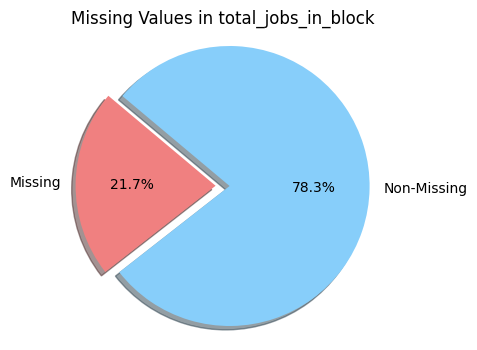

In [20]:
# Step 1: Count missing and non-missing values
missing_total_jobs_count = emp_block_df['total_jobs_in_block'].isnull().sum()
non_missing_total_jobs_count = emp_block_df['total_jobs_in_block'].notnull().sum()

# Create a dictionary for the counts
missing_data = {
    'Missing': missing_total_jobs_count,
    'Non-Missing': non_missing_total_jobs_count
}

# Step 2: Create a pie chart
labels = list(missing_data.keys())
sizes = list(missing_data.values())
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the slice for missing values

plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Missing Values in total_jobs_in_block')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

The above figure illustrates that approximately 21.7% of the values in the total_jobs_in_block column are missing. This is a significant issue that we need to handle properly. Because total number of jobs in each block is a key fact analyzing the hot spot for restaurants. otherwise, it could mislead the findings. 

The presence of such a substantial portion of missing data can introduce bias, lead to loss of information, and affect the accuracy and reliability of our analysis. Therefore, careful consideration and appropriate imputation methods are necessary to address this issue

Impute missing values in total_jobs_in_block column, by the mean of related block_id group. Still need to improve this metod.

WIP . . .

#### Data Preprocessing

In [21]:
# Calculate the mean of total jobs in each block
block_mean_jobs = emp_block_df.groupby('block_id')['total_jobs_in_block'].transform('mean')

# Create a new column for the imputed total jobs in block
emp_block_df['total_jobs_in_block_imputed'] = emp_block_df.apply(
    lambda row: row['total_jobs_in_block'] if pd.notnull(row['total_jobs_in_block']) and row['total_jobs_in_block'] != 0
    else block_mean_jobs[row.name],
    axis=1
)

print(emp_block_df.head())

   census_year  block_id  clue_small_area  accommodation  \
0         2022         4  Melbourne (CBD)            0.0   
1         2022         5  Melbourne (CBD)            0.0   
2         2022         6  Melbourne (CBD)            0.0   
3         2022        13  Melbourne (CBD)            NaN   
4         2022        16  Melbourne (CBD)            NaN   

   admin_and_support_services  agriculture_and_mining  \
0                         0.0                     0.0   
1                         0.0                     0.0   
2                         0.0                     0.0   
3                       520.0                     0.0   
4                         NaN                     0.0   

   arts_and_recreation_services  business_services  construction  \
0                         362.0                0.0           0.0   
1                           0.0                0.0           0.0   
2                         203.0                0.0           0.0   
3                       

#### 2.3 Block Data set

In [22]:
# Check for missing values in the Blocks dataset
missing_values_blocks = block_df.isnull().sum()

# Display columns with missing values
print(missing_values_blocks[missing_values_blocks > 0])

# Check data types of each column
print(block_df.dtypes)


Series([], dtype: int64)
geo_point_2d    object
geo_shape       object
block_id         int64
clue_area       object
dtype: object


### Blocks Dataset Summary

It looks like there are no missing values in the **Blocks Dataset**, and the data types are as expected:

- **geo_point_2d**: object
- **geo_shape**: object
- **block_id**: int64
- **clue_area**: object


### Dataset Summary and Recommendation

#### **Dataset 1: Cafes and Restaurants with Seating Capacity**
- **Records**: 60,055
- **Description**: This dataset contains information about cafes, restaurants, and bistros in Melbourne, including seating capacities, addresses, and geographic coordinates (latitude and longitude).
- **Missing Values**: Longitude, Latitude, and Location (527 missing values each). These were handled through geocoding and by dropping rows with remaining missing values.


- **Pros**: Large dataset with detailed information about cafes and seating capacity. The size of the dataset provides rich insights for analysis.
- **Cons**: Geographic data (latitude, longitude) had missing values that required imputation or dropping, which might limit precise spatial analysis in some areas.


#### **Dataset 2: Employment by Block by CLUE Industry**
- **Records**: 12,349
- **Description**: This dataset provides employment data across various industries in Melbourne, categorized by block IDs. It includes total jobs per block as well as jobs within specific industries.
- **Missing Values**:
  - Multiple industry categories have missing values, ranging from 599 to 3,927.
  - `total_jobs_in_block` had 2,686 missing values, which were imputed.


- **Pros**: Moderately large dataset with a variety of employment data across different industries. Useful for understanding employment patterns and worker density.
- **Cons**: Significant missing values across multiple job categories. `total_jobs_in_block` had substantial missing values that were imputed, which may affect the accuracy of employment analysis.


#### **Dataset 3: Blocks for Census of Land Use and Employment (CLUE)**
- **Records**: 606
- **Description**: This dataset includes geographic data and block IDs for various areas in Melbourne, useful for mapping and location-based analysis.
- **Missing Values**: None.


- **Pros**: Complete dataset with no missing values. Provides essential geographic and block-level details for location-based analysis.
- **Cons**: Smaller dataset (606 records) compared to others, which may limit the scope of extensive analysis or require careful integration with other datasets.





### 3 Data Analysis

#### 3.1 Aggregate Seating Capacity by CLUE Small Area

In [23]:
# Calculate the total seating capacity per CLUE small area
seating_capacity_per_area = cafes_df_cleaned.groupby('clue_small_area')['number_of_seats'].sum().reset_index()

# Rename the columns for clarity
seating_capacity_per_area.columns = ['CLUE Small Area', 'Total Seating Capacity']

# Display the first few rows of the result
print(seating_capacity_per_area.head())


   CLUE Small Area  Total Seating Capacity
0          Carlton                  323936
1        Docklands                  338629
2   East Melbourne                  141114
3       Kensington                  104167
4  Melbourne (CBD)                 1777753


#### 3.1 Visualization

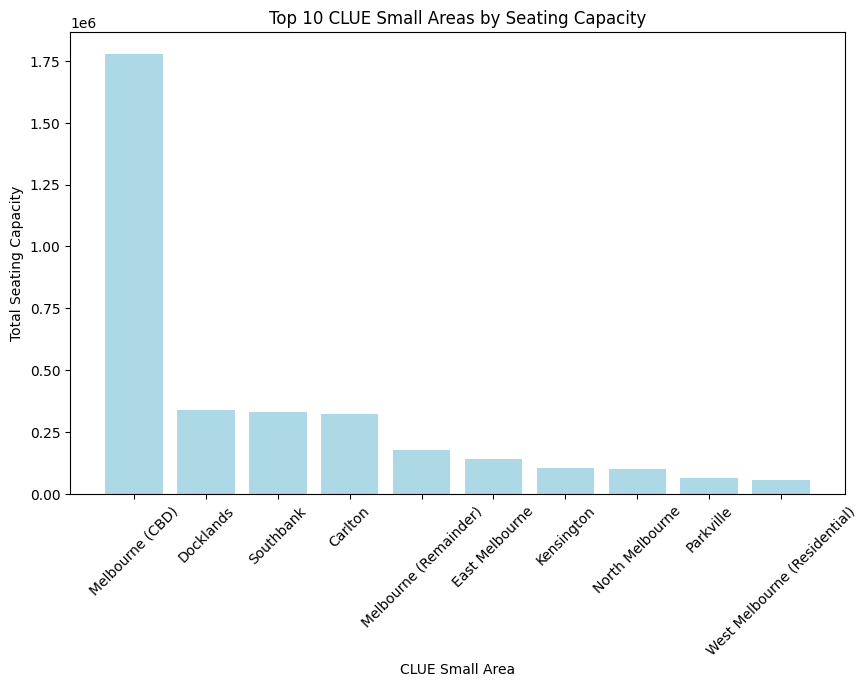

In [24]:
import matplotlib.pyplot as plt

# Select the top 10 CLUE small areas with the highest seating capacity
top_10_areas_seating = seating_capacity_per_area.nlargest(10, 'Total Seating Capacity')

# Bar Chart: Top 10 CLUE small areas with the highest seating capacity
plt.figure(figsize=(10, 6))
plt.bar(top_10_areas_seating['CLUE Small Area'], top_10_areas_seating['Total Seating Capacity'], color='lightblue')
plt.xlabel('CLUE Small Area')
plt.ylabel('Total Seating Capacity')
plt.title('Top 10 CLUE Small Areas by Seating Capacity')
plt.xticks(rotation=45)
plt.show()


### 3.2 Aggregate Employment by CLUE Small Area

In [25]:
# Calculate the total number of workers per CLUE small area
workers_per_area = emp_block_df.groupby('clue_small_area')['total_jobs_in_block'].sum().reset_index()

# Rename the columns for clarity
workers_per_area.columns = ['CLUE Small Area', 'Total Workers']

# Display the first few rows of the result
print(workers_per_area.head())


             CLUE Small Area  Total Workers
0                    Carlton       350122.0
1  City of Melbourne (total)      8803643.0
2                  Docklands       857046.0
3             East Melbourne       445854.0
4                 Kensington       118612.0


#### 3.2 Visualization

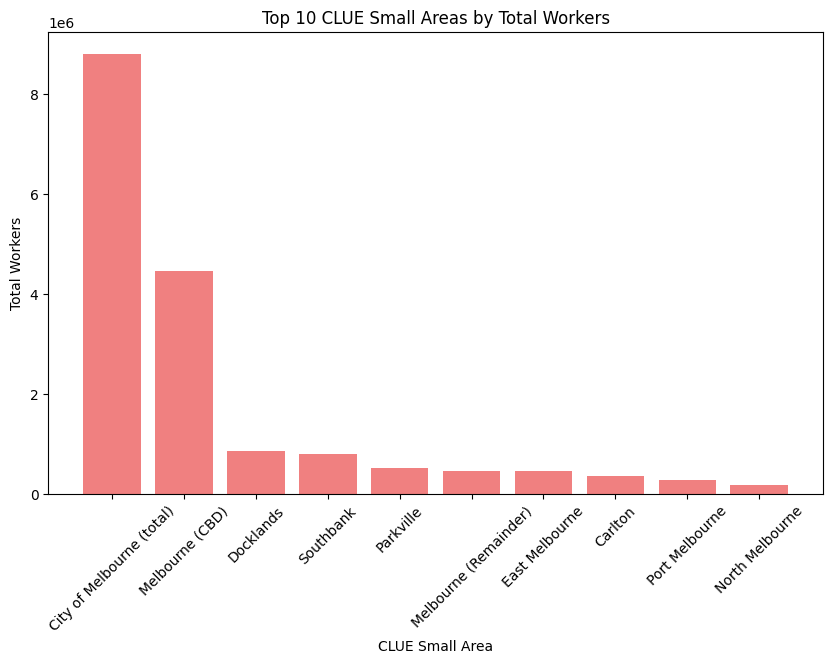

In [26]:
# Select the top 10 CLUE small areas with the highest total workers
top_10_areas_workers = workers_per_area.nlargest(10, 'Total Workers')

# Bar Chart: Top 10 CLUE small areas with the highest total workers
plt.figure(figsize=(10, 6))
plt.bar(top_10_areas_workers['CLUE Small Area'], top_10_areas_workers['Total Workers'], color='lightcoral')
plt.xlabel('CLUE Small Area')
plt.ylabel('Total Workers')
plt.title('Top 10 CLUE Small Areas by Total Workers')
plt.xticks(rotation=45)
plt.show()


#### 3.3 Merge the Data and Calculate Worker-to-Seat Ratio

### Step 3: Merging Seating Capacity and Employment Data for CLUE Small Areas

In this step, we merge the seating capacity and employment data for each CLUE small area. This combined dataset allows us to analyze the relationship between the number of available seats in cafes/restaurants and the total number of workers in the area.

We calculate the **worker-to-seat ratio**, which provides insight into areas where there may be a potential mismatch between available seating and business activity. A high worker-to-seat ratio indicates that there are significantly more workers than available seats, potentially signaling an area where more cafes/restaurants may be needed to meet demand.

By visualizing this ratio across all CLUE small areas, we can identify hotspots where there is a high demand for additional seating capacity, guiding decision-making for potential restaurant/cafe expansion.


In [27]:
# Merge seating capacity and workers per CLUE small area
area_comparison_df = pd.merge(seating_capacity_per_area, workers_per_area, on='CLUE Small Area', how='inner')

# Calculate the worker-to-seat ratio for each CLUE small area
area_comparison_df['Worker to Seat Ratio'] = area_comparison_df['Total Workers'] / area_comparison_df['Total Seating Capacity']

# Display the first few rows of the result
print(area_comparison_df.head())


   CLUE Small Area  Total Seating Capacity  Total Workers  \
0          Carlton                  323936       350122.0   
1        Docklands                  338629       857046.0   
2   East Melbourne                  141114       445854.0   
3       Kensington                  104167       118612.0   
4  Melbourne (CBD)                 1777753      4444043.0   

   Worker to Seat Ratio  
0              1.080837  
1              2.530929  
2              3.159531  
3              1.138672  
4              2.499809  


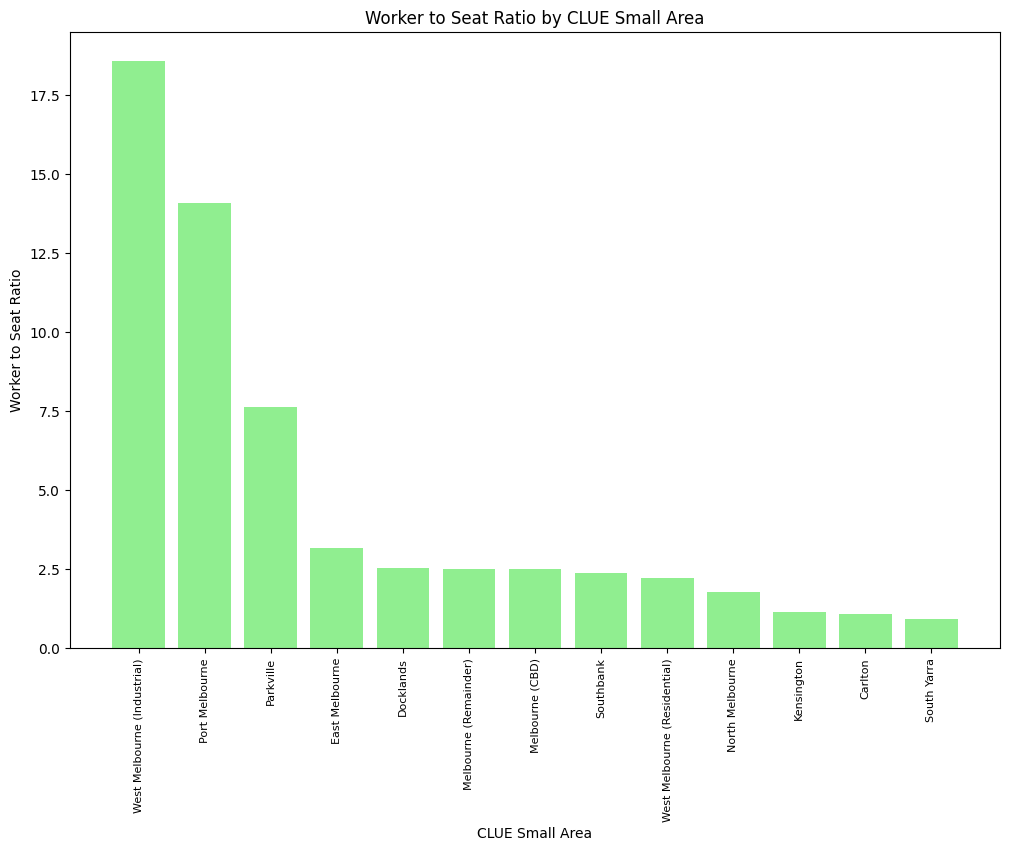

In [28]:
# Sort CLUE small areas by worker-to-seat ratio in descending order
area_comparison_sorted = area_comparison_df.sort_values(by='Worker to Seat Ratio', ascending=False)

# Bar Chart: Worker to Seat Ratio for all CLUE small areas
plt.figure(figsize=(12, 8))
plt.bar(area_comparison_sorted['CLUE Small Area'], area_comparison_sorted['Worker to Seat Ratio'], color='lightgreen')
plt.xlabel('CLUE Small Area')
plt.ylabel('Worker to Seat Ratio')
plt.title('Worker to Seat Ratio by CLUE Small Area')
plt.xticks(rotation=90, fontsize=8)  # Rotate x-axis labels to fit better
plt.show()


### 4

In [62]:
import pandas as pd

# Split 'geo_point_2d' into 'latitude' and 'longitude'
Small_CLUE_area[['latitude', 'longitude']] = Small_CLUE_area['geo_point_2d'].str.split(',', expand=True)
Small_CLUE_area['latitude'] = Small_CLUE_area['latitude'].astype(float)
Small_CLUE_area['longitude'] = Small_CLUE_area['longitude'].astype(float)

# Merge the CLUE small areas data with geo-coordinates into the existing area_comparison_df
merged_clue_geo_df = pd.merge(area_comparison_df, Small_CLUE_area[['featurenam', 'latitude', 'longitude','geo_shape',]], 
                              left_on='CLUE Small Area', right_on='featurenam', how='left')

# Display the merged dataframe with geo-coordinates
print(merged_clue_geo_df.head())


   CLUE Small Area  Total Seating Capacity  Total Workers  \
0          Carlton                  323936       350122.0   
1        Docklands                  338629       857046.0   
2   East Melbourne                  141114       445854.0   
3       Kensington                  104167       118612.0   
4  Melbourne (CBD)                 1777753      4444043.0   

   Worker to Seat Ratio       featurenam   latitude   longitude  \
0              1.080837          Carlton -37.796012  144.966376   
1              2.530929        Docklands -37.818518  144.941685   
2              3.159531   East Melbourne -37.814581  144.982501   
3              1.138672       Kensington -37.791530  144.920500   
4              2.499809  Melbourne (CBD) -37.813811  144.962915   

                                           geo_shape  
0  {"coordinates": [[[[144.9732217743585, -37.807...  
1  {"coordinates": [[[[144.95143788598978, -37.81...  
2  {"coordinates": [[[[144.9732217743585, -37.807...  
3  {"coord

In [49]:
import folium
from folium.plugins import MarkerCluster
import json

# Initialize a map centered around Melbourne
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Function to add geojson shape to the map
def add_shape(row, map_obj):
    geo_shape = row['geo_shape']
    
    # Convert geo_shape from string to dictionary if needed
    if isinstance(geo_shape, str):
        geo_shape = json.loads(geo_shape)
    
    folium.GeoJson(
        geo_shape,
        style_function=lambda feature: {
            'fillColor': 'orange',
            'color': 'orange',
            'weight': 2,
            'fillOpacity': 0.3,
        },
        highlight_function=lambda feature: {
            'weight': 3,
            'color': 'orange',
            'fillOpacity': 0.6,
        },
        tooltip=f"CLUE Small Area: {row['featurenam']}",
    ).add_to(map_obj)

# Loop through the merged dataframe and add markers and shapes to the map
for idx, row in merged_clue_geo_df.iterrows():
    # Add the marker
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"CLUE Small Area: {row['featurenam']}<br>"
              f"Total Workers: {row['Total Workers']}<br>"
              f"Total Seating Capacity: {row['Total Seating Capacity']}<br>"
              f"Worker to Seat Ratio: {row['Worker to Seat Ratio']}",
        icon=folium.Icon(color='blue' if row['Worker to Seat Ratio'] > 5 else 'green')
    ).add_to(marker_cluster)
    
    # Add the shape
    add_shape(row, m)

# Display the map
m


In [50]:
import folium
from folium.plugins import MarkerCluster
import json
import numpy as np

# Initialize a map centered around Melbourne
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Function to add geojson shape to the map with color coding based on worker-to-seat ratio
def add_shape(row, map_obj):
    geo_shape = row['geo_shape']
    
    # Convert geo_shape from string to dictionary if needed
    if isinstance(geo_shape, str):
        geo_shape = json.loads(geo_shape)
    
    # Assign a color based on worker-to-seat ratio
    ratio = row['Worker to Seat Ratio']
    if ratio > 10:
        color = 'red'
    elif ratio > 5:
        color = 'orange'
    else:
        color = 'green'
    
    folium.GeoJson(
        geo_shape,
        style_function=lambda feature: {
            'fillColor': color,
            'color': color,
            'weight': 2,
            'fillOpacity': 0.3,
        },
        highlight_function=lambda feature: {
            'weight': 3,
            'color': 'yellow',
            'fillOpacity': 0.6,
        },
        tooltip=f"CLUE Small Area: {row['featurenam']}<br>"
                f"Worker to Seat Ratio: {ratio:.2f}",
    ).add_to(map_obj)

# Loop through the merged dataframe and add markers and shapes to the map
for idx, row in merged_clue_geo_df.iterrows():
    # Add the marker
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"CLUE Small Area: {row['featurenam']}<br>"
              f"Total Workers: {row['Total Workers']}<br>"
              f"Total Seating Capacity: {row['Total Seating Capacity']}<br>"
              f"Worker to Seat Ratio: {row['Worker to Seat Ratio']:.2f}",
        icon=folium.Icon(color='blue' if row['Worker to Seat Ratio'] > 5 else 'green')
    ).add_to(marker_cluster)
    
    # Add the shape with color coding
    add_shape(row, m)

# Display the map
m


### Updated map

In [54]:
import folium
from folium.plugins import MarkerCluster
import json

# Initialize a map centered around Melbourne
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Function to add geojson shape to the map with professional tooltips and annotations
def add_shape(row, map_obj):
    geo_shape = row['geo_shape']
    
    # Convert geo_shape from string to dictionary if needed
    if isinstance(geo_shape, str):
        geo_shape = json.loads(geo_shape)
    
    # Assign a color based on worker-to-seat ratio
    ratio = row['Worker to Seat Ratio']
    if ratio > 10:
        color = 'red'
    elif ratio > 5:
        color = 'orange'
    else:
        color = 'green'
    
    # Create a popup with detailed information
    popup_content = f"""
    <strong>CLUE Small Area:</strong> {row['featurenam']}<br>
    <strong>Total Workers:</strong> {row['Total Workers']:.0f}<br>
    <strong>Total Seating Capacity:</strong> {row['Total Seating Capacity']:.0f}<br>
    <strong>Worker to Seat Ratio:</strong> {ratio:.2f}
    """
    popup = folium.Popup(popup_content, max_width=300)

    # Professional tooltip content
    tooltip_content = f"""
    <div style="font-family: Arial, sans-serif; font-size: 12px; padding: 5px;">
        <strong>{row['featurenam']}</strong><br>
        <span style="color: gray;">Workers: {row['Total Workers']:.0f}</span><br>
        <span style="color: gray;">Seats: {row['Total Seating Capacity']:.0f}</span><br>
        <span style="color: {'#FF6347' if ratio > 10 else '#FFA500' if ratio > 5 else '#32CD32'};">
        Worker to Seat Ratio: {ratio:.2f}</span>
    </div>
    """

    # Add geojson shape with popup and professional tooltip
    folium.GeoJson(
        geo_shape,
        style_function=lambda feature: {
            'fillColor': color,
            'color': color,
            'weight': 2,
            'fillOpacity': 0.3,
        },
        highlight_function=lambda feature: {
            'weight': 3,
            'color': 'yellow',
            'fillOpacity': 0.6,
        },
        tooltip=folium.Tooltip(tooltip_content, sticky=False),
    ).add_child(popup).add_to(map_obj)

# Loop through the merged dataframe and add markers and shapes to the map
for idx, row in merged_clue_geo_df.iterrows():
    # Add the marker
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"CLUE Small Area: {row['featurenam']}<br>"
              f"Total Workers: {row['Total Workers']}<br>"
              f"Total Seating Capacity: {row['Total Seating Capacity']}<br>"
              f"Worker to Seat Ratio: {row['Worker to Seat Ratio']:.2f}",
        icon=folium.Icon(color='blue' if row['Worker to Seat Ratio'] > 5 else 'green')
    ).add_to(marker_cluster)
    
    # Add the shape with color coding and professional tooltip
    add_shape(row, m)

# Display the map
m


### 4.2 cluslting

In [57]:
from sklearn.cluster import KMeans

# Prepare the data for clustering
worker_to_seat_ratios = merged_clue_geo_df[['Worker to Seat Ratio']].values

# Apply K-Means clustering to divide into 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
merged_clue_geo_df['cluster'] = kmeans.fit_predict(worker_to_seat_ratios)

# Define cluster colors (you can adjust these if necessary)
cluster_colors = {
    0: 'green',   # Cluster 1
    1: 'red',  # Cluster 2
    2: 'orange'      # Cluster 3
}

# Display the first few rows to check the clusters
print(merged_clue_geo_df[['CLUE Small Area', 'Worker to Seat Ratio', 'cluster']].head())


   CLUE Small Area  Worker to Seat Ratio  cluster
0          Carlton              1.080837        0
1        Docklands              2.530929        0
2   East Melbourne              3.159531        0
3       Kensington              1.138672        0
4  Melbourne (CBD)              2.499809        0


Map using clustering

In [58]:
import folium
from folium.plugins import MarkerCluster
import json

# Initialize a map centered around Melbourne
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Function to add geojson shape to the map with professional tooltips and annotations
def add_shape(row, map_obj):
    geo_shape = row['geo_shape']
    
    # Convert geo_shape from string to dictionary if needed
    if isinstance(geo_shape, str):
        geo_shape = json.loads(geo_shape)
    
    # Assign color based on the cluster label
    color = cluster_colors[row['cluster']]
    
    # Create a popup with detailed information
    popup_content = f"""
    <strong>CLUE Small Area:</strong> {row['featurenam']}<br>
    <strong>Total Workers:</strong> {row['Total Workers']:.0f}<br>
    <strong>Total Seating Capacity:</strong> {row['Total Seating Capacity']:.0f}<br>
    <strong>Worker to Seat Ratio:</strong> {row['Worker to Seat Ratio']:.2f}
    """
    popup = folium.Popup(popup_content, max_width=300)

    # Professional tooltip content
    tooltip_content = f"""
    <div style="font-family: Arial, sans-serif; font-size: 12px; padding: 5px;">
        <strong>{row['featurenam']}</strong><br>
        <span style="color: gray;">Workers: {row['Total Workers']:.0f}</span><br>
        <span style="color: gray;">Seats: {row['Total Seating Capacity']:.0f}</span><br>
        <span style="color: {color};">Worker to Seat Ratio: {row['Worker to Seat Ratio']:.2f}</span>
    </div>
    """

    # Add geojson shape with popup and professional tooltip
    folium.GeoJson(
        geo_shape,
        style_function=lambda feature: {
            'fillColor': color,
            'color': color,
            'weight': 2,
            'fillOpacity': 0.3,
        },
        highlight_function=lambda feature: {
            'weight': 3,
            'color': 'yellow',
            'fillOpacity': 0.6,
        },
        tooltip=folium.Tooltip(tooltip_content, sticky=False),
    ).add_child(popup).add_to(map_obj)

# Loop through the merged dataframe and add markers and shapes to the map
for idx, row in merged_clue_geo_df.iterrows():
    # Add the marker
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"CLUE Small Area: {row['featurenam']}<br>"
              f"Total Workers: {row['Total Workers']}<br>"
              f"Total Seating Capacity: {row['Total Seating Capacity']}<br>"
              f"Worker to Seat Ratio: {row['Worker to Seat Ratio']:.2f}",
        icon=folium.Icon(color=cluster_colors[row['cluster']])
    ).add_to(marker_cluster)
    
    # Add the shape with color coding and professional tooltip
    add_shape(row, m)

# Display the map
m


Year filter test

In [60]:
import folium
from folium.plugins import MarkerCluster
import json

# Example years in your data
years = [2018, 2019, 2020, 2021]

# Initialize a map centered around Melbourne
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Function to add geojson shape to the map
def add_shape(row, map_obj, color):
    geo_shape = row['geo_shape']
    
    # Convert geo_shape from string to dictionary if needed
    if isinstance(geo_shape, str):
        geo_shape = json.loads(geo_shape)
    
    # Add geojson shape
    folium.GeoJson(
        geo_shape,
        style_function=lambda feature: {
            'fillColor': color,
            'color': color,
            'weight': 2,
            'fillOpacity': 0.3,
        },
        highlight_function=lambda feature: {
            'weight': 3,
            'color': 'yellow',
            'fillOpacity': 0.6,
        },
        tooltip=f"CLUE Small Area: {row['featurenam']}<br>Year: {row['year']}",
    ).add_to(map_obj)

# Loop through the years and create layers for each year
for year in years:
    year_layer = folium.FeatureGroup(name=str(year)).add_to(m)
    
    # Filter the dataframe by the current year
    year_data = merged_clue_geo_df[merged_clue_geo_df['Census year'] == year]
    
    # Loop through the filtered data and add markers and shapes to the map
    for idx, row in year_data.iterrows():
        # Add the marker
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"CLUE Small Area: {row['featurenam']}<br>"
                  f"Total Workers: {row['Total Workers']}<br>"
                  f"Total Seating Capacity: {row['Total Seating Capacity']}<br>"
                  f"Worker to Seat Ratio: {row['Worker to Seat Ratio']:.2f}<br>"
                  f"Year: {row['year']}",
            icon=folium.Icon(color='blue' if row['Worker to Seat Ratio'] > 5 else 'green')
        ).add_to(marker_cluster)
        
        # Add the shape with color coding
        add_shape(row, year_layer, cluster_colors[row['cluster']])

# Add layer control to toggle between years
folium.LayerControl().add_to(m)

# Display the map
m


KeyError: 'Census year'

## tREND aNALYSIS

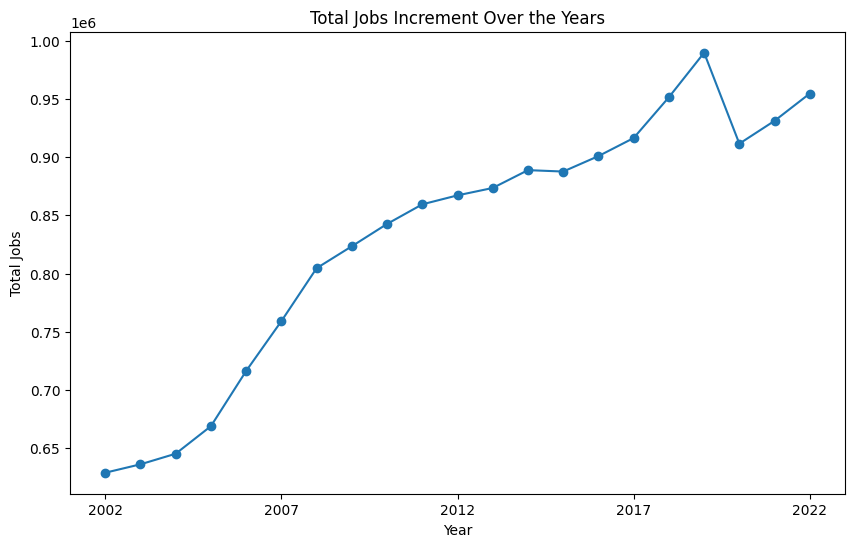

In [ ]:
# Grouping the data by 'census_year' and summing up the 'total_jobs_in_block'
jobs_by_year = emp_block_df.groupby('census_year')['total_jobs_in_block'].sum()

# Ensure the job totals are integers
jobs_by_year = jobs_by_year.astype(int)

# Plotting the data
plt.figure(figsize=(10, 6))
jobs_by_year.plot(kind='line', marker='o')
plt.title('Total Jobs Increment Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Jobs')

# Setting x-ticks to show only some of the years (e.g., every 5 years)
plt.xticks(ticks=jobs_by_year.index[::5], labels=[str(year) for year in jobs_by_year.index[::5]])

plt.grid(False)  # Disable the grid

plt.show()

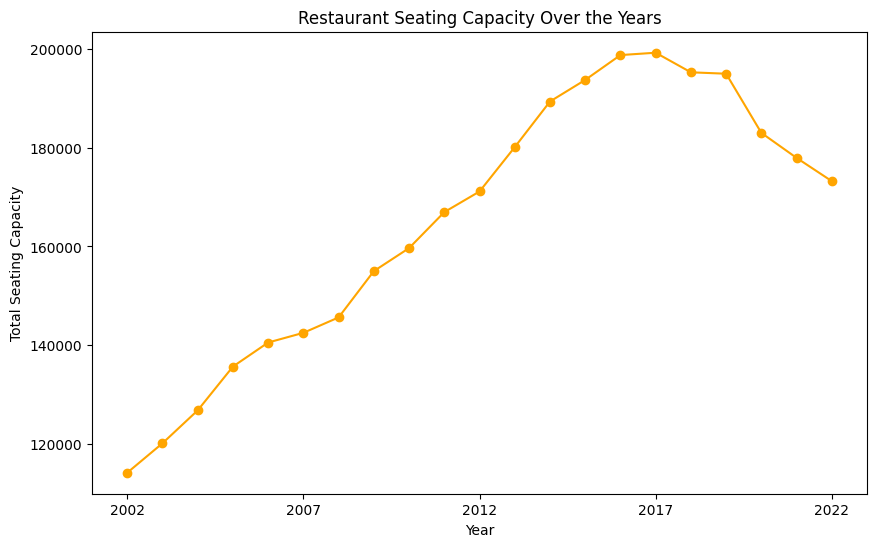

In [ ]:
# Grouping the data by 'census_year' and summing up the 'number_of_seats'
seating_by_year = cafe_df.groupby('census_year')['number_of_seats'].sum()

# Plotting the data
plt.figure(figsize=(10, 6))
seating_by_year.plot(kind='line', marker='o', color='orange')
plt.title('Restaurant Seating Capacity Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Seating Capacity')

# Setting x-ticks to show only some of the years (e.g., every 5 years)
plt.xticks(ticks=seating_by_year.index[::5], labels=[str(year) for year in seating_by_year.index[::5]])

plt.grid(False)  # Disable the grid

plt.show()
